# 1. Linear Regression with OLS(Ordinary Least Square)
#### y = ax + b의 간단한 선형회귀식을 만들어 오차제곱합을 최소화하는 a와 b를 찾아봅시다

In [1]:
# 단순 선형 회귀를 위한 임의의 데이터셋을 생성합니다.
seed = 1215
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=1, noise=3.0, random_state=seed)

X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]

### 1-1. 다음과 같은 산점도(scatter plot)을 그려주세요

In [2]:
import matplotlib.pyplot as plt


plt.scatter(X,y ,label="train", color="r", marker='o')
plt.scatter(X_test,y_test ,label="test", color="b", marker='o')


plt.legend(["train", "test"])
plt.show()


<Figure size 640x480 with 1 Axes>

### 1-2. h(x) = x+1 일때, train set(X_train, y_train)의 오차 제곱합 평균(Mean Square Error)을 구하세요

In [3]:
from datetime import datetime
import numpy as np

def MSE(X_train, y_train):
    error = 0
    for i, j in zip(X_train,y_train):
        error += ((i+1)-j)**2
    return error/len(X_train)

# seed가 같을 경우 MSE값은 같아야 합니다.
start = datetime.now()
print(MSE(X_train, y_train))
print(datetime.now()-start)

[90.55459607]
0:00:00.019792


### 1.3 h(x) = 2x 일 때, train set(X_train, y_train)의 오차 제곱합 평균(Mean Square Error)을 구하세요

In [4]:
import numpy as np
from datetime import datetime

y_train = y_train.reshape(800,1)

m = y_train.size

# Your Code Here(np.dot과 .T(transpose)를 이용해 짜보세요 MSE with vectorize)
def h(theta,X):
    return np.dot(theta,X)
# np.dot = 행렬의 제곱

def MSE(mytheta,X,y):
    A = np.sum(np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))
    B = len(X) * 2
    return A/B

# seed가 같을 경우 MSE값은 같아야 합니다.
# vertorize된 함수가 훨씬 빠릅니다 !
start = datetime.now()
print(MSE(2,X_train,y_train))
print(datetime.now()-start)

35.905558387581024
0:00:00.002085


### 1-4. sklearn.linear_model의 Linear Regression을 이용해 최적의 a,b를 찾으세요

y = 9.8012X + -0.1666
Mean Squared Error : 9.352834376815956
R^2 : 0.8995829250965823


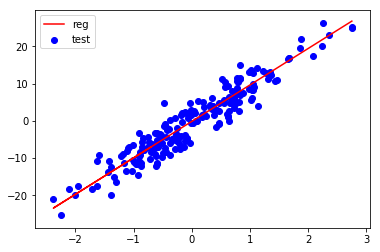

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Your Code Here(sklearn에서 LinearRegression 함수를 불러오고 X_train과 y_train에 적합시켜보세요)

model= LinearRegression()
model.fit(X_train, y_train)

# optimal a,b based on OLS
print("y = %.4fX + %.4f"%(float(model.coef_[0]),float(model.intercept_)))

# Your Code Here(X_test에 대해서 predict를 해보고 mse를 구해보세요)
predict = model.predict(X_test)
mse = mean_squared_error(predict,y_test)


# r2_score
r_square = r2_score(y_test, predict)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

# Your Code Here (test set을 scatter plot으로 나타내고, 본인이 구한 선형회귀식을 다음과 같은 직선으로 나타내보세요)

plt.plot(X_test,predict,c='r',label='reg')
plt.scatter(X_test,y_test,c='b',label='test')

plt.legend(["reg","test"])
plt.show()

# 2. Linear Regression with Gradient Descent

![gradientdescent](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg)

### 2-1. h(x) = ax라는 식을 만들어 Gradient Descent를 이용해 mse를 최소화하는 a를 찾아보세요

In [6]:
iterations = 10000
learningrate = 0.01
m = y_train.size
y_test = y_test.reshape(200,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    
    for meaningless in range(iterations):
        # Your Code Here 
        # (newtheta = theta-(learningrate/number of training examples)X derivative Loss with respect to theta)
        # Loss function을 theta에 대해 직접 미분해보세요(tip.Chain rule)
        ###
        

    y_pred = theta*X_test
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', round(theta,3), '\n','MSE :', round(MSE(theta, X_test, y_test),3),'\n', 'R^2 :', round(r_square,3))

IndentationError: expected an indented block (<ipython-input-6-5f999848421b>, line 16)

In [8]:
Gradientdescent(X_train,y_train,0)

NameError: name 'Gradientdescent' is not defined

### 2-2. 이번에는 같은 함수에서 iteration 전에 Loss(MSE)를 계산해보고 다음과 같은 plot으로 나타내보세요

In [9]:
iterations = 10000
learningrate = 0.01
m = y_train.size

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    Loss = []
    for meaningless in range(iterations):
        # Your Code Here
        ###
        ###
    return Loss

Loss = Gradientdescent(X_train,y_train, 0)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.xlim([0,1000])
plt.ylim([0,10])
# Your Code Here
###

IndentationError: expected an indented block (<ipython-input-9-5200474c6cd9>, line 13)

# 2. Logistic Regression

In [10]:
import sklearn.datasets
seed = 1215
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative = 2, n_redundant = 0, n_repeated = 0,random_state = seed)

X_train = X[:800]
X_train = X_train[:,0]
X_test = X[800:]
X_test = X_test[:,0]
y_train = y[:800]
y_test = y[800:]

### 2-1. 다음과 같은 산점도를 그려주세요

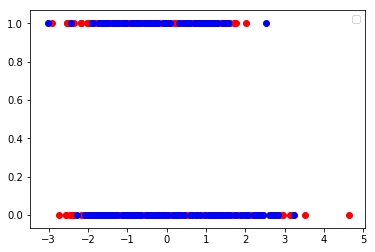

In [11]:
import matplotlib.pyplot as plt

plt.legend(["train", "test"])


plt.scatter(X_train,y_train,c='r',label='train')
plt.scatter(X_test,y_test,c='b',label='train')

plt.show()

### 2-2. 가중치가 1일 때 loss를 계산해보세요. h(x) = 1/1+e^-x 입니다
![logisticregression](https://i.stack.imgur.com/XbU4S.png)

In [12]:
import math

def sigmoid(x, mytheta):
    try:
            output = 1 / (1 + np.exp(-mytheta*x))
    except:
            output = 0
    return output

In [13]:
def LogisticLoss(X, y, mytheta):
    error0 = 0
    error1 = 0
# Your Code Here(for문을 이용해 짜보세요)
# math.log는 0에 가까우면 오류가 뜹니다(계산이 안됩니다).
# try, except를 이용해 sigmoid와 같이 log값을 700 또는 -700으로 설정해주세요
    for i, j in zip(X, y):
        if j == 0:
            try:
                error0 += - np.log(1-sigmoid(i, mytheta) + 0.001)
            except:
                pass
        elif j == 1:
            try:
                error1 += - np.log(sigmoid(i, mytheta)+0.001)
            except:
                pass
    return (error0 + error1) /len(X)

# seed가 같을 경우 LogisticLoss값은 같아야 합니다.
print(LogisticLoss(X_train, y_train, 1))

0.8309437805013792


### 2-3. Gradient Descent 기반으로 주어진 loss를 최소화하는 weight를 찾아보세요.

In [14]:
iterations = 1000
learningrate = 0.002
m = y_train.size

# 초기값은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    for meaningless in range(iterations):
        # Your Code Here
        # Cross Entropy Loss를 theta에 대해 미분하면 됩니다.
        # Cross Entropy Loss 미분은 아래의 동영상을 참고하세요
        # https://www.youtube.com/watch?v=mLth3-4yn4Q 
      
    LogisticLoss(X_test, y_test, theta)
    return print('Optimal "a" is:', round(theta,3), '\n','Logistic Loss :', round(LogisticLoss(X_test, y_test, theta),3))

IndentationError: expected an indented block (<ipython-input-14-2f14ac97bf3d>, line 14)

In [15]:
Gradientdescent(X_train,y_train,100)

NameError: name 'Gradientdescent' is not defined

### 2-4. Loss의 변화를 plot으로 나타내보세요.

In [16]:
iterations = 1000
learningrate = 0.0001
m = y_train.size

# 초기값은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    loss = []
    for meaningless in range(iterations):
        loss.append(LogisticLoss(X, y, theta))
        theta -= learningrate*(np.sum(-(y-sigmoid(X, theta_start)).T*X)/m)
        LogisticLoss(X_test, y_test, theta)       
    return loss

In [17]:
# 100으로 하면 Convergence가 좀 더 잘 보입니다.
Loss = Gradientdescent(X_train,y_train,100)
Loss

[2.8598603290362212,
 2.859860314380461,
 2.859860299724686,
 2.859860285068895,
 2.859860270413088,
 2.8598602557572668,
 2.8598602411014293,
 2.859860226445576,
 2.8598602117897087,
 2.8598601971338247,
 2.859860182477927,
 2.859860167822011,
 2.8598601531660814,
 2.8598601385101357,
 2.8598601238541748,
 2.859860109198197,
 2.859860094542206,
 2.859860079886198,
 2.8598600652301753,
 2.8598600505741363,
 2.8598600359180817,
 2.859860021262013,
 2.859860006605927,
 2.859859991949828,
 2.8598599772937114,
 2.8598599626375805,
 2.8598599479814335,
 2.85985993332527,
 2.859859918669092,
 2.8598599040128976,
 2.8598598893566898,
 2.859859874700464,
 2.8598598600442244,
 2.8598598453879696,
 2.8598598307316987,
 2.859859816075412,
 2.85985980141911,
 2.8598597867627915,
 2.8598597721064607,
 2.8598597574501117,
 2.8598597427937476,
 2.8598597281373683,
 2.8598597134809722,
 2.8598596988245633,
 2.859859684168137,
 2.8598596695116965,
 2.8598596548552395,
 2.859859640198768,
 2.85985962554

(0, 1)

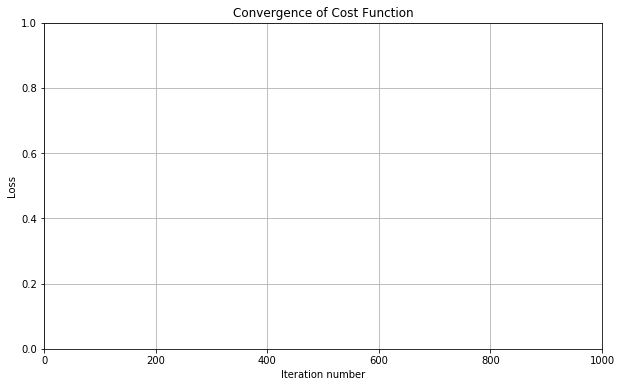

In [18]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.xlim([0,1000])
plt.ylim([0,1])
#Your Code Here


# 고생하셨습니다 :)